In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("C:\\Users\\ankit\\Documents\\Project Files\\datasets_9768_13874_HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

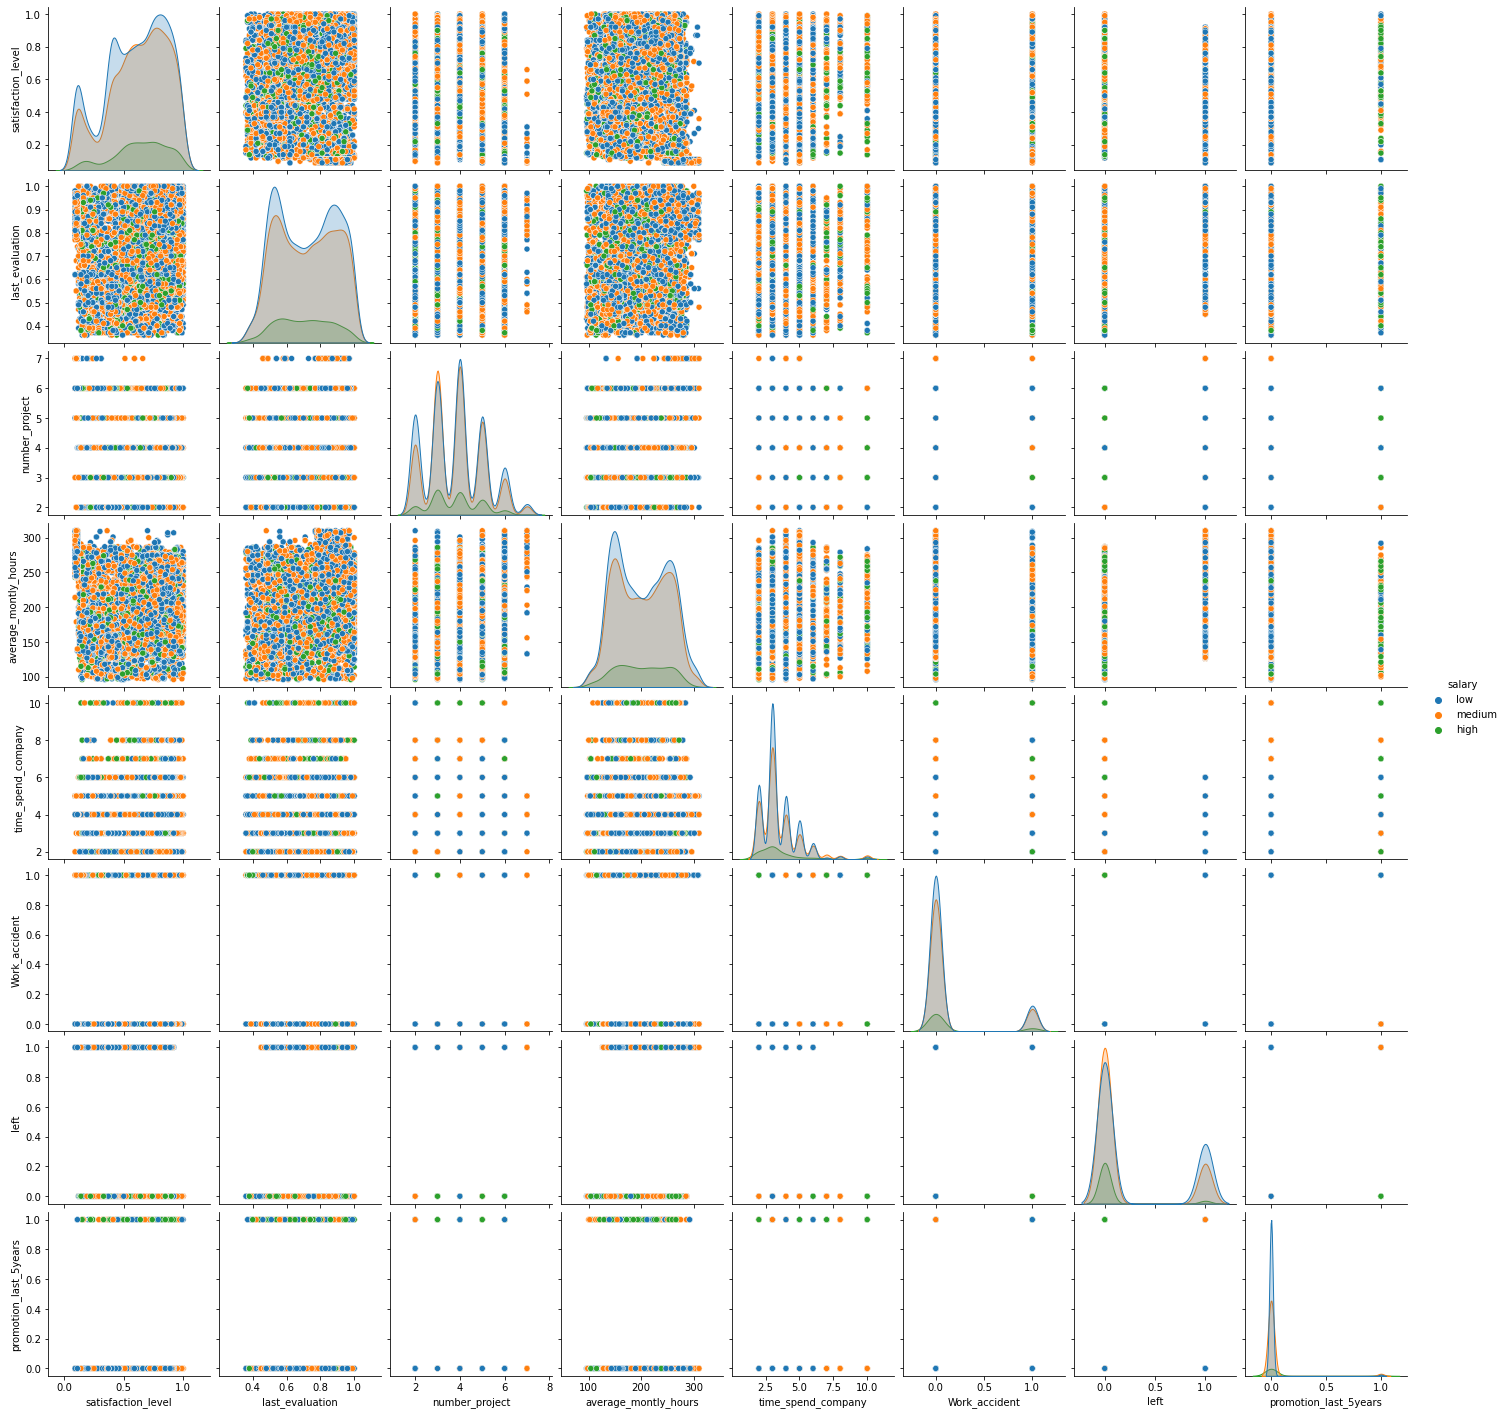

In [4]:
sns.pairplot(df,hue='salary') A 

<AxesSubplot:xlabel='salary', ylabel='count'>

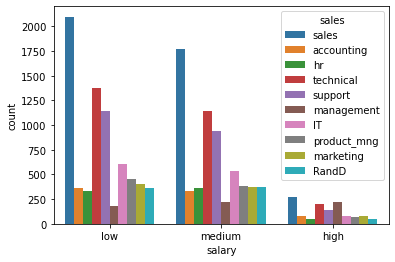

In [5]:
sns.countplot(x='salary',data=df,hue='sales')

In [6]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


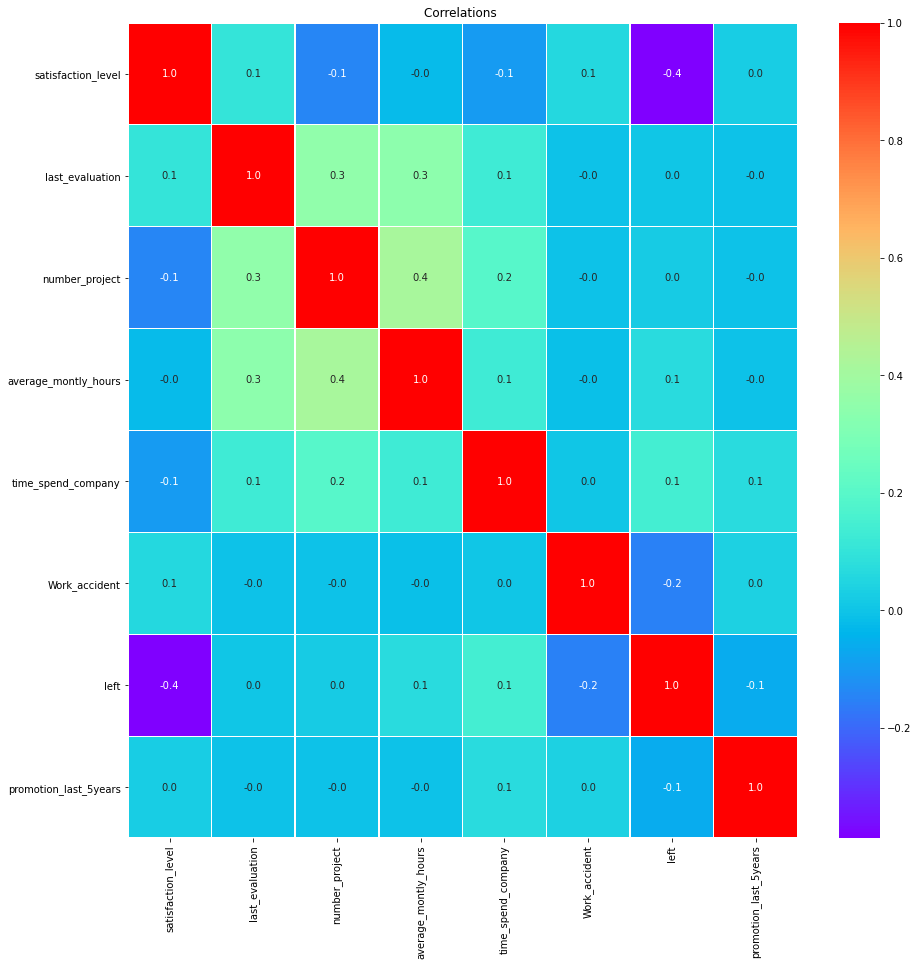

In [7]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap='rainbow')
plt.title('Correlations ')
plt.show()

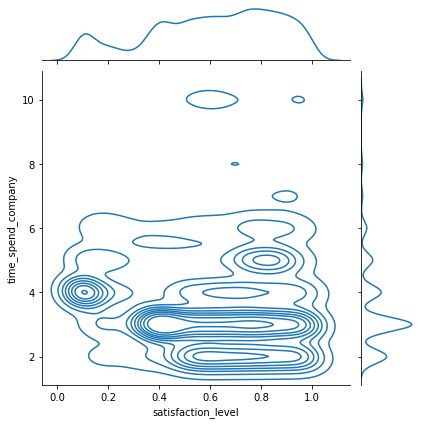

In [8]:
sns.jointplot(x='satisfaction_level',y='time_spend_company',data=df,kind='kde',palette='RdBur=r') 

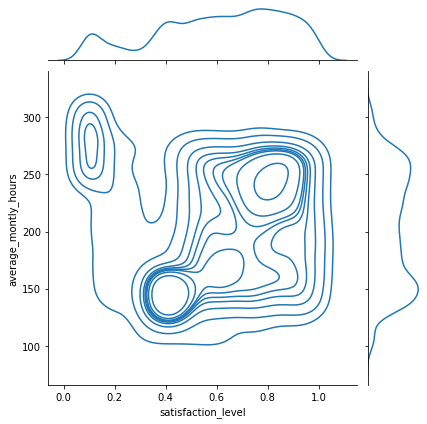

In [9]:
sns.jointplot(x='satisfaction_level',y='average_montly_hours',data=df,kind='kde',palette='RdBur=r')

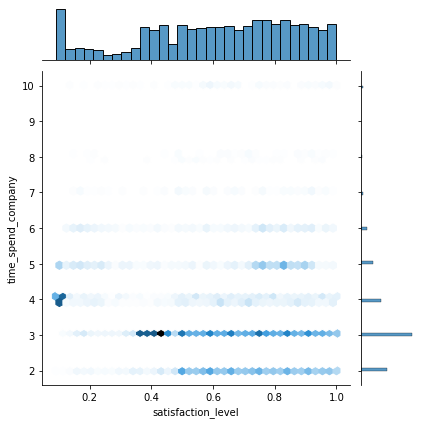

In [10]:
sns.jointplot(x='satisfaction_level',y='time_spend_company',data=df,kind='hex',palette='RdBur=r') 

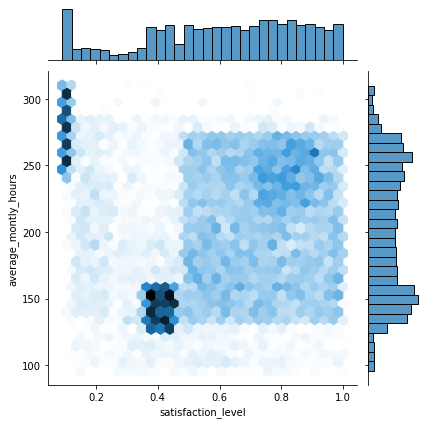

In [11]:
sns.jointplot(x='satisfaction_level',y='average_montly_hours',data=df,kind='hex',palette='RdBur=r') 

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction_level', ylabel='Density'>

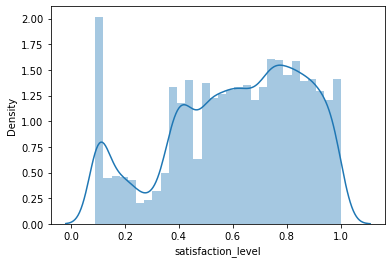

In [12]:
sns.distplot(df['satisfaction_level'])

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

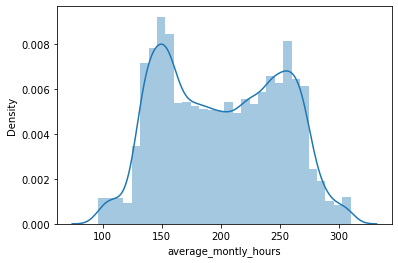

In [13]:
sns.distplot(df['average_montly_hours'])

In [ ]:
sns.distplot(df['time_spend_company'])

In [ ]:
sns.boxplot(x='number_project',y='time_spend_company',hue='salary',data=df)

In [ ]:
sns.violinplot(x='number_project',y='time_spend_company',data=df)

In [ ]:
sns.violinplot(x='number_project',y='average_montly_hours',data=df)

In [ ]:
sns.violinplot(x='number_project',y='average_montly_hours',hue='salary',data=df)
plt.legend(loc=0)

<AxesSubplot:xlabel='number_project', ylabel='average_montly_hours'>

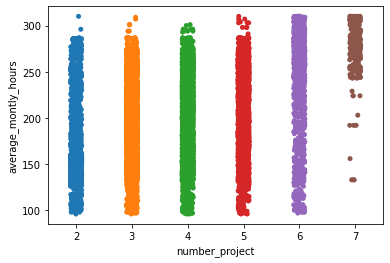

In [15]:
sns.stripplot(x='number_project',y='average_montly_hours',data=df)

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ankit\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.6% of the points

<AxesSubplot:xlabel='number_project', ylabel='average_montly_hours'>

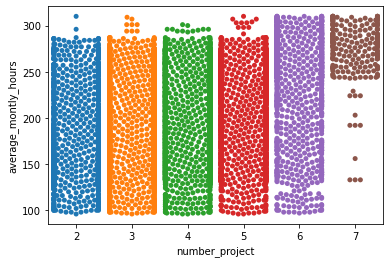

In [16]:
sns.swarmplot(x='number_project',y='average_montly_hours',data=df)

In [ ]:
list=["sales","salary"] 
label=LabelEncoder()
list1=[]
for i in list:
    list1.append(label.fit_transform(df[i]))

In [ ]:
new_list=["sales","salary"] 
for i in range(len(list)):
    df[new_list[i]]=list1[i]

In [ ]:
df.head()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
x = df.drop('salary',axis=1)
Y = df['salary']
selector = SelectKBest(chi2, k=6)
selector.fit(x, Y)
X_new = selector.transform(x)
print(X.columns[selector.get_support(indices=True)])

In [ ]:
X=df[['satisfaction_level', 'average_montly_hours', 'time_spend_company',
       'number_project', 'promotion_last_5years', 'sales']]
y=df['salary']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predict_knn=knn.predict(X_test)
print(classification_report(y_test,predict_knn))
print(confusion_matrix(y_tes
                       t,predict_knn))

In [ ]:
knn.score(X_train,y_train)

In [ ]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
predict_rfc=rfc.predict(X_train)
print(classification_report(y_train,predict_rfc))
print(confusion_matrix(y_train,predict_rfc))

In [ ]:
rfc.score(X_train,y_train)